In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\sachin\visa\visa-status-prediction-1 - Copy\datasets\Feature_engineered_data.csv")

In [4]:
df.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,case_status,annual_wage,application_year,application_month,has_previous_rejection,...,region_of_employment_South,region_of_employment_West,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master,visa_E-2,visa_H-1B,visa_L-1,visa_O-1,visa_TN
0,0,0,14513,2007,1,0,1231782.032,2023,1,0,...,0,1,0,1,0,False,False,True,False,False
1,1,0,2412,2002,1,1,83425.650,2023,12,0,...,0,0,0,0,1,False,False,False,False,True
2,0,1,44444,2008,1,0,122996.860,2022,5,0,...,0,1,0,0,0,False,False,False,False,True
3,0,0,98,1897,1,0,83434.030,2023,7,0,...,0,1,0,0,0,False,False,False,True,False
4,1,0,1082,2005,1,1,149907.390,2023,2,0,...,1,0,0,0,1,False,False,True,False,False


In [5]:
# Assuming 'df' is your DataFrame
print(df["no_of_employees"].describe())


count     25480.000000
mean       5669.797645
std       22877.372247
min          12.000000
25%        1028.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64


In [6]:
df.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,full_time_position,case_status,annual_wage,application_year,application_month,has_previous_rejection,...,region_of_employment_South,region_of_employment_West,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master,visa_E-2,visa_H-1B,visa_L-1,visa_O-1,visa_TN
0,0,0,14513,2007,1,0,1231782.032,2023,1,0,...,0,1,0,1,0,False,False,True,False,False
1,1,0,2412,2002,1,1,83425.650,2023,12,0,...,0,0,0,0,1,False,False,False,False,True
2,0,1,44444,2008,1,0,122996.860,2022,5,0,...,0,1,0,0,0,False,False,False,False,True
3,0,0,98,1897,1,0,83434.030,2023,7,0,...,0,1,0,0,0,False,False,False,True,False
4,1,0,1082,2005,1,1,149907.390,2023,2,0,...,1,0,0,0,1,False,False,True,False,False


In [7]:
print(df["processing_time_days"].describe())

count    25480.000000
mean        95.759812
std         24.724856
min         29.000000
25%         79.000000
50%         95.000000
75%        112.000000
max        192.000000
Name: processing_time_days, dtype: float64


Linear Regression

In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error



X = df.drop(columns=["case_status", "processing_time_days"])
y = df["processing_time_days"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_preds = lr_model.predict(X_test_scaled)
print(f"Linear Regression R2: {r2_score(y_test, lr_preds):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lr_preds):.2f} days")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, lr_preds):.2f} days")



Linear Regression R2: 0.7380
Mean Absolute Error: 10.34 days
Root Mean Squared Error: 12.64 days


Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print(f"Random Forest R2 Score: {r2_score(y_test, rf_preds):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_preds):.2f} days")
print(f"RMSE: {root_mean_squared_error(y_test, rf_preds):.2f} days")

Random Forest R2 Score: 0.9700
Mean Absolute Error: 3.55 days
RMSE: 4.28 days


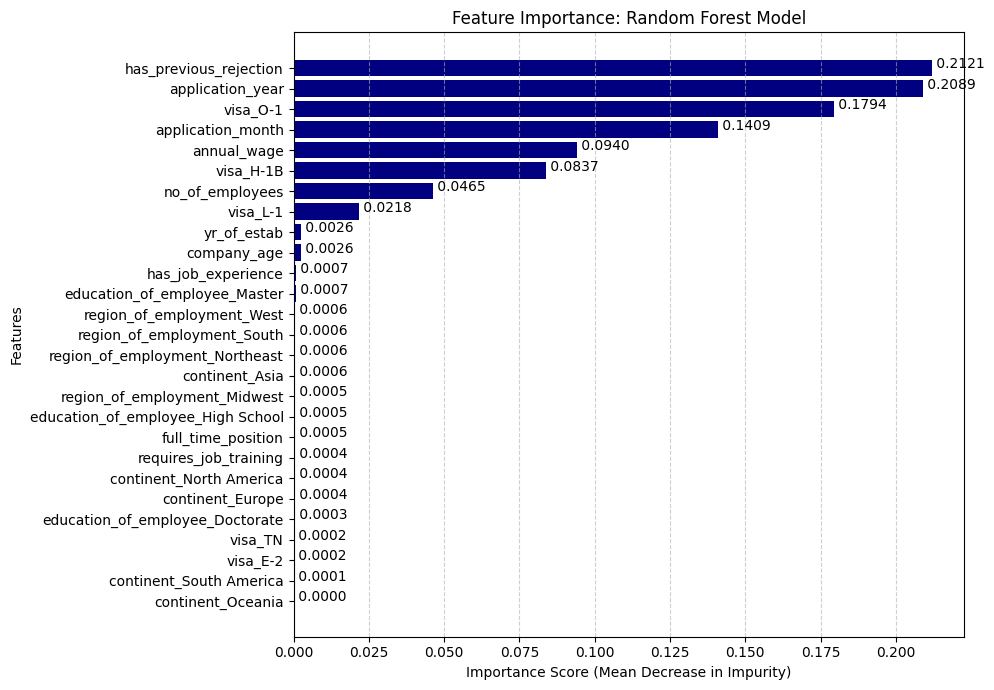


Top Contributing Features:
                              Feature  Importance
8              has_previous_rejection    0.212076
6                    application_year    0.208941
25                           visa_O-1    0.179401
7                   application_month    0.140863
5                         annual_wage    0.093982
23                          visa_H-1B    0.083677
2                     no_of_employees    0.046463
24                           visa_L-1    0.021785
3                         yr_of_estab    0.002612
9                         company_age    0.002608
0                  has_job_experience    0.000746
21       education_of_employee_Master    0.000655
18          region_of_employment_West    0.000644
17         region_of_employment_South    0.000627
16     region_of_employment_Northeast    0.000602
10                     continent_Asia    0.000596
15       region_of_employment_Midwest    0.000539
20  education_of_employee_High School    0.000466
4                  ful

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extract importance from the trained model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame for sorting and visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# 3. Plotting
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='navy')
plt.xlabel('Importance Score (Mean Decrease in Impurity)')
plt.ylabel('Features')
plt.title('Feature Importance: Random Forest Model')

# Add numeric labels to the end of each bar
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f' {value:.4f}')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Display sorted ranking
print("\nTop Contributing Features:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Fine Tuned Random Forest Regressor

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# 1. Define the parameter grid
# We use a mix of shallow and deep trees to find the sweet spot for your 29 features
param_dist = {
    'n_estimators': [100, 200],           # Don't waste time on 500+ trees
    'max_depth': [None, 20],              # Keep it close to "unlimited" depth
    'min_samples_split': [2, 5],          # Very minor constraints
    'max_features': [1.0, 'sqrt']
}

# 2. Initialize the Base Model
rf = RandomForestRegressor(random_state=42)

# 3. Set up Randomized Search 
# n_iter=20 means we try 20 random combinations. 
# cv=3 means 3-fold cross-validation.
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,    # Only 5 combinations (super fast)
    cv=2,        # Minimal validation folds
    n_jobs=-1,
    verbose=1
)

# 4. Run the Search
print("Starting fine-tuning... (this may take a few minutes)")
rf_random.fit(X_train, y_train)

# 5. Extract the Best Model
best_rf_model = rf_random.best_estimator_
print(f"\nBest Parameters found: {rf_random.best_params_}")

# 6. Predict and Evaluate
rf_preds = best_rf_model.predict(X_test)

print("\n--- Tuned Model Performance ---")
print(f"Random Forest R2 Score: {r2_score(y_test, rf_preds):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_preds):.2f} days")
print(f"RMSE: {root_mean_squared_error(y_test, rf_preds):.2f} days")

# 7. Visualize Feature Importance
# With 29 features, this helps you see which ones actually drive the "days" prediction
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features for clarity



Starting fine-tuning... (this may take a few minutes)
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best Parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 1.0, 'max_depth': 20}

--- Tuned Model Performance ---
Random Forest R2 Score: 0.9701
Mean Absolute Error: 3.55 days
RMSE: 4.28 days


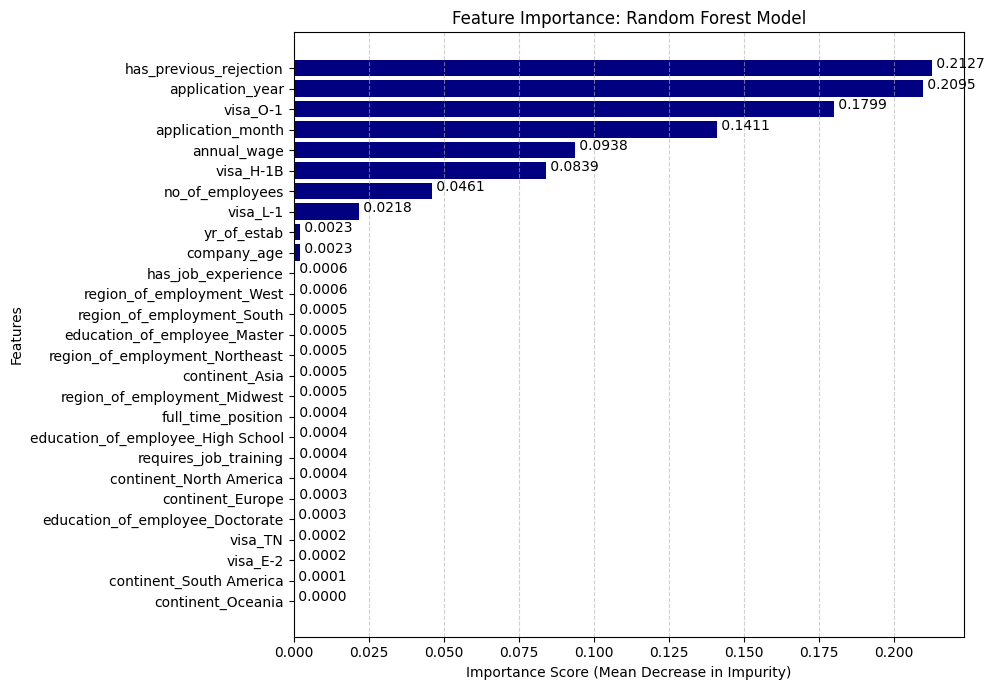


Top Contributing Features:
                              Feature  Importance
8              has_previous_rejection    0.212715
6                    application_year    0.209542
25                           visa_O-1    0.179941
7                   application_month    0.141068
5                         annual_wage    0.093784
23                          visa_H-1B    0.083929
2                     no_of_employees    0.046127
24                           visa_L-1    0.021846
3                         yr_of_estab    0.002275
9                         company_age    0.002271
0                  has_job_experience    0.000619
18          region_of_employment_West    0.000556
17         region_of_employment_South    0.000538
21       education_of_employee_Master    0.000536
16     region_of_employment_Northeast    0.000505
10                     continent_Asia    0.000498
15       region_of_employment_Midwest    0.000466
4                  full_time_position    0.000415
20  education_of_emplo

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extract importance from the trained model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame for sorting and visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# 3. Plotting
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='navy')
plt.xlabel('Importance Score (Mean Decrease in Impurity)')
plt.ylabel('Features')
plt.title('Feature Importance: Random Forest Model')

# Add numeric labels to the end of each bar
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f' {value:.4f}')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Display sorted ranking
print("\nTop Contributing Features:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Hist Gradient Boosting Regressor

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(
    max_iter=500,           
    learning_rate=0.03,     
    max_depth=10,           
    l2_regularization=1.5,  
    min_samples_leaf=20,    
    random_state=42
)

model.fit(X_train, y_train)


hgb_preds = model.predict(X_test)

print(f"Final R2 Score (Clean Data): {r2_score(y_test, hgb_preds):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, hgb_preds):.2f} days")
print(f"RMSE: {root_mean_squared_error(y_test, hgb_preds):.2f} days")

Final R2 Score (Clean Data): 0.9755
Mean Absolute Error: 3.30 days
RMSE: 3.86 days


Fined Tuned HistGradientBoostingRegressor

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np

# 1. Define a narrow search space around your current success
param_distributions = {
    'max_iter': [500, 700],             # See if more iterations help
    'learning_rate': [0.02, 0.03, 0.05], # Subtle shifts in step size
    'max_depth': [8, 10, 12],            # Slight depth variations
    'l2_regularization': [1.0, 1.5, 2.0],# Control for overfitting
    'min_samples_leaf': [15, 20, 25],    # Node size
    'max_bins': [255]                    # Default is 255; usually plenty
}

# 2. Initialize the search
# We use n_iter=10 because your R2 is already 0.97; we don't need 100 trials.
hgb_random = RandomizedSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# 3. Fit the search
print("Fine-tuning the HGBR model...")
hgb_random.fit(X_train, y_train)

# 4. Results
best_hgb = hgb_random.best_estimator_
print(f"\nBest Params: {hgb_random.best_params_}")

# 5. Evaluate
hgb_preds = best_hgb.predict(X_test)
print("\n--- Optimized HGBR Performance ---")
print(f"Final R2 Score: {r2_score(y_test, hgb_preds):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, hgb_preds):.2f} days")
print(f"RMSE: {root_mean_squared_error(y_test, hgb_preds):.2f} days")

Fine-tuning the HGBR model...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Params: {'min_samples_leaf': 20, 'max_iter': 500, 'max_depth': 10, 'max_bins': 255, 'learning_rate': 0.05, 'l2_regularization': 1.5}

--- Optimized HGBR Performance ---
Final R2 Score: 0.9755
Mean Absolute Error: 3.30 days
RMSE: 3.87 days


Calculating feature importance (permutation method)...


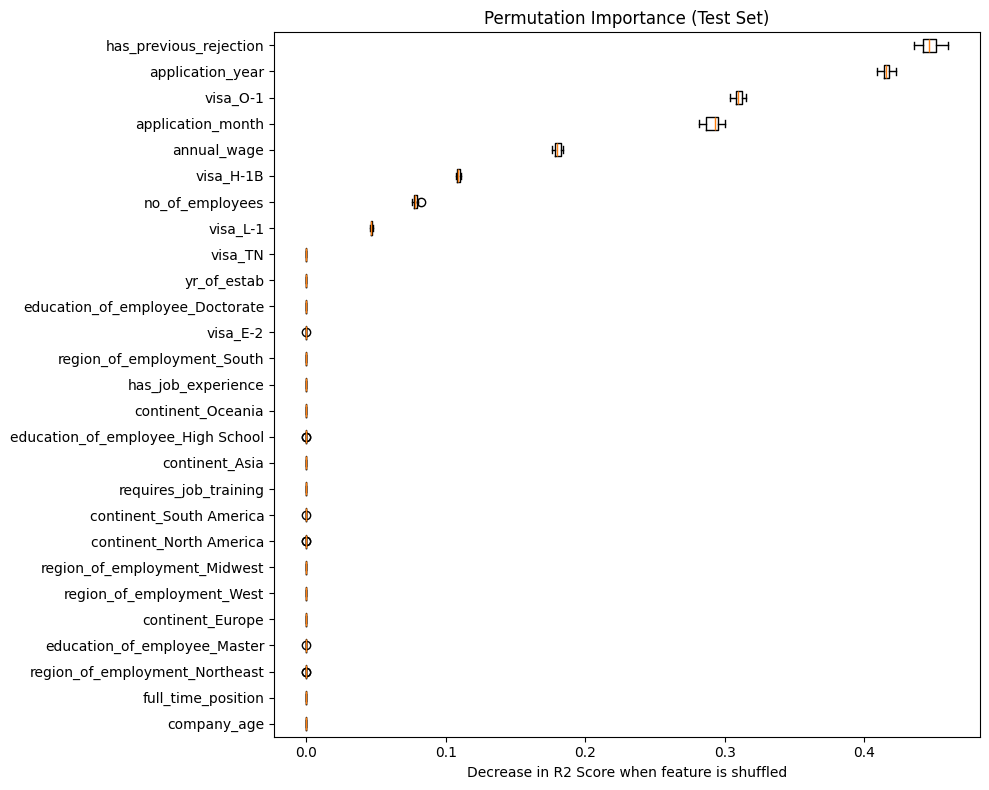


Top 5 Most Important Features:
has_previous_rejection: 0.4472
application_year: 0.4161
visa_O-1: 0.3101
application_month: 0.2915
annual_wage: 0.1802


In [15]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 1. Calculate Permutation Importance
# This takes a bit of time because it re-evaluates the model multiple times
print("Calculating feature importance (permutation method)...")
result = permutation_importance(
    best_hgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# 2. Organize the data
sorted_idx = result.importances_mean.argsort()
feature_names = X_train.columns

# 3. Plot the top features
plt.figure(figsize=(10, 8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=feature_names[sorted_idx]
)
plt.title("Permutation Importance (Test Set)")
plt.xlabel("Decrease in R2 Score when feature is shuffled")
plt.tight_layout()
plt.show()

# Print the top 5 for quick reading
print("\nTop 5 Most Important Features:")
for i in sorted_idx[::-1][:5]:
    print(f"{feature_names[i]}: {result.importances_mean[i]:.4f}")

In [16]:
train_r2 = best_hgb.score(X_train, y_train)
test_r2 = best_hgb.score(X_test, y_test)

print(f"Training R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Difference: {train_r2 - test_r2:.4f}")

Training R2: 0.9773
Test R2: 0.9755
Difference: 0.0018


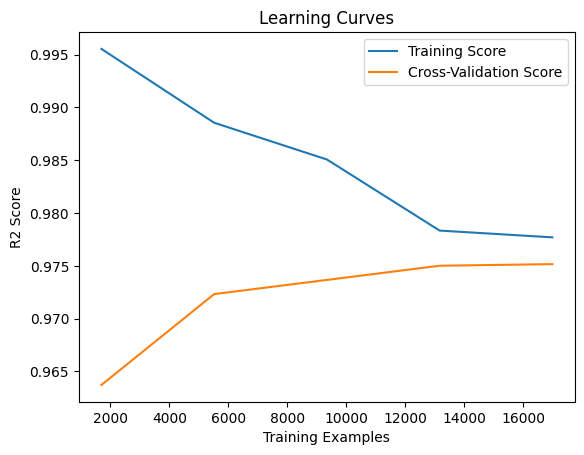

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_hgb, X, y, cv=3, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate means
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plotting
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [19]:
import joblib
import os
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Define your candidates (assuming you've initialized/trained these)
models = {
    "GradientBoosting": model,
    "TunedGradientBoosting": best_hgb,
    "RandomForest": rf_model,
    "TunedRandomForest": best_rf_model,
    "LinearRegression": lr_model
}

best_model = None
best_r2 = -float('inf')
results = {}

# 2. Evaluate and compare
print("Evaluating models...")
for name, model in models.items():
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    
    results[name] = {"R2": r2, "RMSE": rmse, "MAE": mae}
    print(f"{name} -> R2: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    # Logic: Select based on highest R2 score
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

# 3. Save the winner
file_path = r'C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\best_visa_model.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)

joblib.dump(best_model, file_path)

print("-" * 30)
print(f"WINNER: {best_model_name} with R2: {best_r2:.4f}")
print(f"Model saved successfully at: {file_path}")

Evaluating models...
GradientBoosting -> R2: 0.9755 | RMSE: 3.8634 | MAE: 3.3039
TunedGradientBoosting -> R2: 0.9755 | RMSE: 3.8662 | MAE: 3.3047
RandomForest -> R2: 0.9700 | RMSE: 4.2818 | MAE: 3.5546
TunedRandomForest -> R2: 0.9703 | RMSE: 4.2606 | MAE: 3.5384
LinearRegression -> R2: -1610698142.9120 | RMSE: 991451.2431 | MAE: 330700.1047


c:\Users\sachin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


------------------------------
WINNER: GradientBoosting with R2: 0.9755
Model saved successfully at: C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\best_visa_model.pkl


In [18]:
import joblib
import os
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Define your candidates (Ensuring they are already trained in your environment)
models = {
    "GradientBoosting": model,
    "TunedGradientBoosting": best_hgb,
    "RandomForest": rf_model,
    "TunedRandomForest": best_rf_model,
    "LinearRegression": lr_model
 }

best_model = None
best_model_name = ""
best_r2 = -float('inf')
best_rmse = float('inf')  # Lower is better
results = {}

print("Evaluating models with tie-breaking logic...")
print("-" * 50)

for name, model in models.items():
    predictions = model.predict(X_test)
    
    # Calculate Metrics
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    
    results[name] = {"R2": r2, "RMSE": rmse, "MAE": mae}
    print(f"{name:22} -> R2: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

    # --- SELECTION LOGIC ---
    # Condition A: Current model has a strictly better R2
    # Condition B: R2 is equal (or nearly equal), but RMSE is lower
    is_better_r2 = r2 > best_r2
    is_tie_but_better_rmse = np.isclose(r2, best_r2, atol=1e-5) and rmse < best_rmse

    if is_better_r2 or is_tie_but_better_rmse:
        best_r2 = r2
        best_rmse = rmse
        best_model = model
        best_model_name = name

# 3. Save the winner
file_path = r'C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\processing_time_model.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
joblib.dump(best_model, file_path)

# 4. Final Summary Message
print("-" * 50)
print(f"🏆 WINNER SELECTED: {best_model_name}")
print(f"📊 Final Stats -> R2: {best_r2:.4f}, RMSE: {best_rmse:.4f}")
print(f"💾 Model saved successfully at: {file_path}")
print("-" * 50)

if any(results[m]['R2'] == best_r2 and m != best_model_name for m in results):
    print(f"Note: {best_model_name} won the tie-break against another model due to a lower RMSE.")

Evaluating models with tie-breaking logic...
--------------------------------------------------
GradientBoosting       -> R2: 0.9755 | RMSE: 3.8634 | MAE: 3.3039
TunedGradientBoosting  -> R2: 0.9755 | RMSE: 3.8655 | MAE: 3.3031
RandomForest           -> R2: 0.9700 | RMSE: 4.2818 | MAE: 3.5546
TunedRandomForest      -> R2: 0.9701 | RMSE: 4.2752 | MAE: 3.5487
LinearRegression       -> R2: -1610698142.9120 | RMSE: 991451.2431 | MAE: 330700.1047


c:\Users\sachin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


--------------------------------------------------
🏆 WINNER SELECTED: GradientBoosting
📊 Final Stats -> R2: 0.9755, RMSE: 3.8634
💾 Model saved successfully at: C:\Users\sachin\visa\visa-status-prediction-1 - Copy\models\processing_time_model.pkl
--------------------------------------------------
